In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mehemmedhaciyev","key":"38713a17258cfda4d7a1f05214804bc0"}'}

In [ ]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')


In [ ]:
!kaggle datasets download jp797498e/twitter-entity-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0


In [ ]:
!unzip /content/twitter-entity-sentiment-analysis.zip

Archive:  /content/twitter-entity-sentiment-analysis.zip
  inflating: twitter_training.csv    
  inflating: twitter_validation.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
train_data = pd.read_csv('/content/twitter_training.csv')

In [ ]:
val_data = pd.read_csv('/content/twitter_validation.csv')

In [ ]:
train_data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
train_data = train_data.drop(columns = ['2401', 'Borderlands'])
train_data

,Positive,"im getting on borderlands and i will murder you all ,"
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
74676,Positive,Just realized that the Windows partition of my...
74677,Positive,Just realized that my Mac window partition is ...
74678,Positive,Just realized the windows partition of my Mac ...
74679,Positive,Just realized between the windows partition of...


In [ ]:
train_data

,Positive,"im getting on borderlands and i will murder you all ,"
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
74676,Positive,Just realized that the Windows partition of my...
74677,Positive,Just realized that my Mac window partition is ...
74678,Positive,Just realized the windows partition of my Mac ...
74679,Positive,Just realized between the windows partition of...


In [ ]:
train_data = train_data.dropna()
train_data

,Positive,"im getting on borderlands and i will murder you all ,"
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
74676,Positive,Just realized that the Windows partition of my...
74677,Positive,Just realized that my Mac window partition is ...
74678,Positive,Just realized the windows partition of my Mac ...
74679,Positive,Just realized between the windows partition of...


In [ ]:
train_data = train_data.drop_duplicates()
train_data

,Positive,"im getting on borderlands and i will murder you all ,"
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
74676,Positive,Just realized that the Windows partition of my...
74677,Positive,Just realized that my Mac window partition is ...
74678,Positive,Just realized the windows partition of my Mac ...
74679,Positive,Just realized between the windows partition of...


In [ ]:
train_data.loc[-1] = train_data.columns
train_data.index = train_data.index + 1
train_data = train_data.sort_index()


train_data.columns = range(train_data.shape[1])

<ipython-input-13-f81e651c64e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[-1] = train_data.columns


In [ ]:
train_data = train_data.rename(columns = {0: 'sentiment', 1: 'tweet'})

In [ ]:
train_data

,sentiment,tweet
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


In [ ]:
!pip install emoji
import re
import string
import emoji

def data_process (text):
    text = text.lower()
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub('[\r\n]+', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = emoji.demojize(text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

train_data['tweet'] = train_data['tweet'].apply(data_process)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 10.0 MB/s eta 0:00:00


In [ ]:
train_data

,sentiment,tweet
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,i am coming to the borders and i will kill you...
2,Positive,im getting on borderlands and i will kill you all
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,just realized that the windows partition of my...
74678,Positive,just realized that my mac window partition is ...
74679,Positive,just realized the windows partition of my mac ...
74680,Positive,just realized between the windows partition of...


In [ ]:
import nltk
nltk.download('punkt') # Download punkt for word_tokenize
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize

train_data['tokens'] = train_data['tweet'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    stop_words.update(['im'])

    keep_words = {
        'no', 'not', 'nor', "don't", "doesn't", "didn't", "isn't", "wasn't",
        "weren't", "won't", "can't", "couldn't", "shouldn't", "wouldn't",
        "haven't", "hasn't", "hadn't", "ain", "aren", "needn", "shan", "mustn", "mightn", "wouldn"
    }

    final_stopwords = stop_words - keep_words

    return [word for word in tokens if word not in final_stopwords]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_data['tokens'] = train_data['tokens'].apply(remove_stopwords)

In [ ]:
train_data

,sentiment,tweet,tokens
0,Positive,im getting on borderlands and i will murder yo...,"[getting, borderlands, murder]"
1,Positive,i am coming to the borders and i will kill you...,"[coming, borders, kill]"
2,Positive,im getting on borderlands and i will kill you all,"[getting, borderlands, kill]"
3,Positive,im coming on borderlands and i will murder you...,"[coming, borderlands, murder]"
4,Positive,im getting on borderlands 2 and i will murder ...,"[getting, borderlands, 2, murder]"
...,...,...,...
74677,Positive,just realized that the windows partition of my...,"[realized, windows, partition, mac, like, 6, y..."
74678,Positive,just realized that my mac window partition is ...,"[realized, mac, window, partition, 6, years, b..."
74679,Positive,just realized the windows partition of my mac ...,"[realized, windows, partition, mac, 6, years, ..."
74680,Positive,just realized between the windows partition of...,"[realized, windows, partition, mac, like, 6, y..."


In [ ]:
val_data.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
val_data.loc[-1] = val_data.columns
val_data.index = val_data.index + 1
val_data = val_data.sort_index()


val_data.columns = range(val_data.shape[1])

In [ ]:
val_data = val_data.drop(columns = [0, 1])
val_data

,2,3
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
val_data = val_data.dropna()
val_data = val_data.drop_duplicates()

In [ ]:
val_data = val_data.rename(columns = {2: 'sentiment', 3: 'tweet'})

In [ ]:
val_data

,sentiment,tweet
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
val_data['tweet'] = val_data['tweet'].map(data_process)

In [ ]:
val_data['tokens'] = val_data['tweet'].apply(word_tokenize)

In [ ]:
val_data['tokens'] = val_data['tokens'].map(remove_stopwords)

In [ ]:
val_data

,sentiment,tweet,tokens
0,Irrelevant,i mentioned on facebook that i was struggling ...,"[mentioned, facebook, struggling, motivation, ..."
1,Neutral,bbc news amazon boss jeff bezos rejects claim...,"[bbc, news, amazon, boss, jeff, bezos, rejects..."
2,Negative,why do i pay for word when it functions so po...,"[pay, word, functions, poorly, chromebook, fac..."
3,Negative,csgo matchmaking is so full of closet hacking ...,"[csgo, matchmaking, full, closet, hacking, tru..."
4,Neutral,now the president is slapping americans in the...,"[president, slapping, americans, face, really,..."
...,...,...,...
995,Irrelevant,star toronto is the arts and culture capital o...,"[star, toronto, arts, culture, capital, canada..."
996,Irrelevant,this is actually a good move tot bring more vi...,"[actually, good, move, tot, bring, viewers, on..."
997,Positive,today sucked so it’s time to drink wine n play...,"[today, sucked, ’, time, drink, wine, n, play,..."
998,Positive,bought a fraction of microsoft today small wins,"[bought, fraction, microsoft, today, small, wins]"


#Tokenizer

In [ ]:
train_sentences = train_data['tweet'].to_numpy()
train_labels = train_data['sentiment'].to_numpy()
validation_sentences = val_data['tweet'].to_numpy()
validation_labels = val_data['sentiment'].to_numpy()

In [ ]:
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(train_data.tweet)

num_unique_words = len(counter)

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences)

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(validation_sentences)

In [ ]:
max_length = 30

train_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
val_padded = tf.keras.preprocessing.sequence.pad_sequences(val_sequences, maxlen=max_length, padding='post', truncating='post')
train_padded.shape, val_padded.shape

((69769, 30), (999, 30))

In [ ]:

train_labels[train_labels=='Negative'] = 0
train_labels[train_labels=='Irrelevant'] = 1
train_labels[train_labels=='Neutral'] = 2
train_labels[train_labels=='Positive'] = 3


validation_labels[validation_labels=='Negative'] = 0
validation_labels[validation_labels=='Irrelevant'] = 1
validation_labels[validation_labels=='Neutral'] = 2
validation_labels[validation_labels=='Positive'] = 3

In [ ]:
train_labels = train_labels.astype(int)
validation_labels = validation_labels.astype(int)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_unique_words, 32, input_length = max_length),
    tf.keras.layers.LSTM(64, dropout = 0.1),
    tf.keras.layers.Dense(4, activation = 'softmax')
])


model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=4,
    restore_best_weights=True
)


In [ ]:
history = model.fit(train_padded, train_labels,
                    epochs=10,
                    validation_data=(val_padded, validation_labels), callbacks=[early_stopping])

Epoch 1/10
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.4612 - loss: 1.1800 - val_accuracy: 0.8138 - val_loss: 0.5462
Epoch 2/10
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7944 - loss: 0.5759 - val_accuracy: 0.8999 - val_loss: 0.3085
Epoch 3/10
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8805 - loss: 0.3482 - val_accuracy: 0.9339 - val_loss: 0.2125
Epoch 4/10
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9110 - loss: 0.2565 - val_accuracy: 0.9469 - val_loss: 0.1833
Epoch 5/10
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9253 - loss: 0.2105 - val_accuracy: 0.9409 - val_loss: 0.1850
Epoch 6/10
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9380 - loss: 0.1707 - val_accuracy: 0.9580 - val_loss: 0.1639
Epoch 7/10
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9477 - loss: 0.1442 - val_accuracy: 0.9600 - val_loss: 0.1474
Epoch 8/10
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9532 - loss: 0

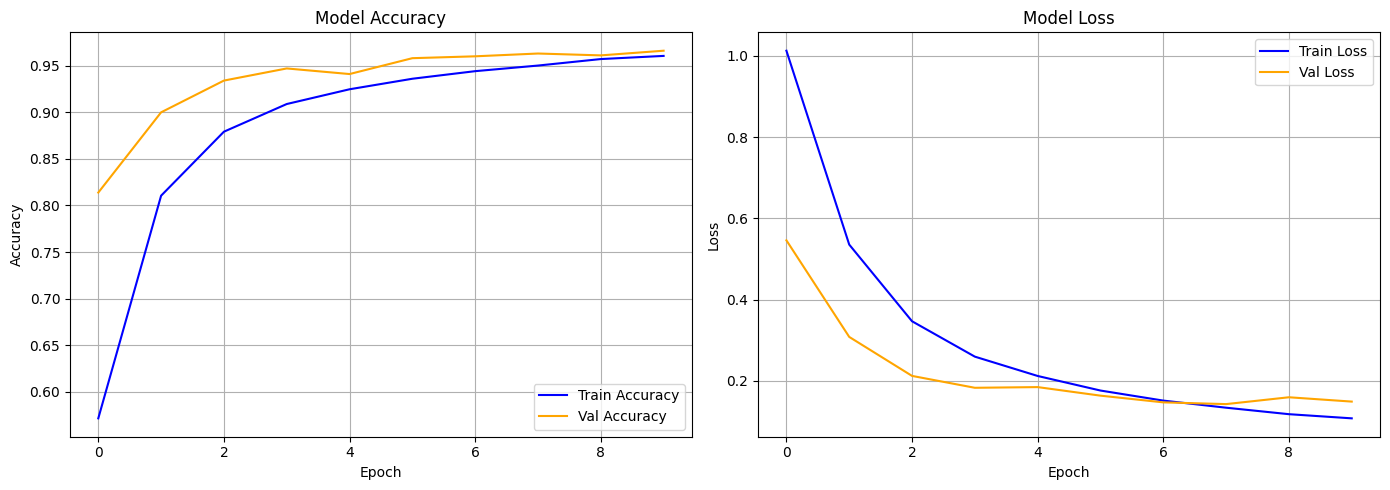

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()